# Global stuff

In [24]:
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Functions

In [ ]:
import os
from typing import Dict, List, Optional

def read_single_file_with_keyword(folder_path: str, filename_search: str):
    """
    Read and parse X-ray scattering data from a single file containing q, intensity, and sigma values.
    
    This function reads a data file from the specified folder and extracts scattering data along with
    instrument metadata. It handles comment lines starting with '#' and parses metadata from lines
    containing timer, bstop, ctemp, and I0 values.
    
    Args:
        folder_path: Path to the directory containing the data file
        filename_search: Name of the file to read (including extension)
        
    Returns:
        Tuple containing data dictionary with 'q_nm^-1', 'I', 'sigma' keys and metadata values
        (timer, bstop, ctemp, I0). Returns None values if file not found or parsing fails.
    """
    file_path = os.path.join(folder_path, f"{filename_search}")

    try:
        with open(file_path, 'r') as file:
            # Read and parse the data from the file
            # Assume the data format includes 'q_nm^-1' and 'I'
            data = {
                "q_nm^-1": [],  # List of q values
                "I": [],  # List of corresponding I values
                "sigma": []  # List of corresponding sigma values
            }

            for i, line in enumerate(file):
                if line.startswith("# Timer:"):  # Check if the line starts with '# Timer:'
                    try:
                        # Remove '#' and split the line into key-value pairs
                        metadata_str = line[1:].strip().split(",")  # Remove '#' and split by commas

                        # Initialize metadata variables
                        timer, bstop, ctemp, I0 = None, None, None, None

                        # Parse key-value pairs
                        for pair in metadata_str:
                            pair = pair.strip()  # Clean up whitespace
                            if ":" not in pair:
                                print(f"Warning: Malformed metadata pair on line {i + 1}: {pair}")
                                continue  # Skip malformed pairs
                            
                            key, value = pair.split(":", 1)  # Split into key and value
                            key = key.strip().lower()  # Standardize the key
                            try:
                                value = float(value.strip())  # Convert value to float
                            except ValueError:
                                print(f"Error: Non-numeric value for key '{key}' on line {i + 1}: {pair}")
                                continue  # Skip invalid values

                            # Assign values to variables based on keys
                            if key == "timer":
                                timer = value
                            elif key == "bstop":
                                bstop = value
                            elif key == "ctemp":
                                ctemp = value
                            elif key == "i0":
                                I0 = value

                        # Verify all metadata were extracted
                        if None in (timer, bstop, ctemp, I0):
                            print(f"Error: Missing metadata values on line {i + 1}: {line.strip()}")
                        else:
                            print(f"Metadata parsed successfully: Timer={timer}, bstop={bstop}, ctemp={ctemp}, I0={I0}")

                    except Exception as e:
                        print(f"Error parsing metadata on line {i + 1}: {line.strip()}")
                        print(f"Exception: {e}")
                    continue





                if line.startswith("#"):  # Skip other comments if any
                    continue

                parts = line.strip().split()  # Assuming data is whitespace-separated
                if len(parts) >= 2:
                    q_value = float(parts[0])
                    I_value = float(parts[1])
                    I_sigma = float(parts[2])
                    # Append values to the data dictionary
                    data["q_nm^-1"].append(q_value)
                    data["I"].append(I_value)
                    data["sigma"].append(I_sigma)

            return data, timer, bstop, ctemp, I0

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None, None, None, None

import os
import re

def search_dat_files_with_keywords(folder_path: str, keyword: str, samp_bkg_keyword: str) -> List[str]:
    """
    Search for .dat files in a folder that match specific keywords in their filenames.
    
    Args:
        folder_path: Path to the directory to search for files
        keyword: Specific keyword to match in filenames (e.g., measurement condition)
        samp_bkg_keyword: Sample or background keyword to match in filenames
        
    Returns:
        List of matching .dat filenames that contain both keywords
    """
    # Create a regular expression pattern to match the keyword and bkg_keyword in the filename
    
    #pattern = re.compile(f"{samp_bkg_keyword}{keyword}_", re.IGNORECASE) # exact match
    pattern = re.compile(f".*{re.escape(samp_bkg_keyword)}.*{re.escape(keyword)}.*", re.IGNORECASE)
    #pattern = re.compile(f"{re.escape(samp_bkg_keyword)}*{re.escape(keyword)}*", re.IGNORECASE)

    #print(f"Pattern: {pattern.pattern}")

    matching_dat_files = []

    # List files in the folder (not including subfolders)
    for file in os.listdir(folder_path):
        if pattern.match(file) and file.endswith('.dat'):
            matching_dat_files.append(file)

    #print(f"Found {len(matching_dat_files)} files matching the pattern '{pattern.pattern}'")
    return matching_dat_files


##########################
## test empample #######
##########################
'''
#folder_path_base = '/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/RT/RTSoak/OneD_integrated_WAXS_01/Correction/Normlised'
folder_path_base = '/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/RT/RTSoak/OneD_integrated_SAXS_01/Correction/Normlised'
#search_keywords = [str(10*i) for i in range(3,25)]
search_keywords = ['dy-1','dy0','dy1']

#capi1: PE powder
sample_keyword = "Run5_PEAcOH1_poly"
bkg_keyword =    "Run1_PEAcOH1_Empty"
empty_keyword =  "RT_Air"

search_dat_files_with_keywords(folder_path_base, 'dy0', empty_keyword)
'''

# Plotting functions

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def darken_colors(num_colors: int, darker_factor: float = 0.7):
    """
    Generate darkened colors by reducing the value component in HSV color space.

    Args:
        num_colors: Number of colors to generate
        darker_factor: Factor to control darkness (0-1, lower = darker)

    Returns:
        Array of darkened colors in RGB format
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_colors))

    # Make the colors darker by reducing the value component
    darker_colors = colors.copy()

    for i in range(num_colors):
        rgb = darker_colors[i, :3]  # Extract the RGB values
        hsv = plt.cm.colors.rgb_to_hsv(rgb)  # Convert RGB to HSV
        hsv[2] *= darker_factor  # Reduce the value component
        darker_colors[i, :3] = plt.cm.colors.hsv_to_rgb(hsv)  # Convert back to RGB

    return darker_colors

def read_data_files(folder_path: str, keywords: List[str]):
    """
    Read and combine data from multiple .dat files matching given keywords.
    
    Args:
        folder_path: Path to directory containing data files
        keywords: List of keywords to search for in filenames
        
    Returns:
        Tuple containing combined DataFrame, list of m_keys for coloring, and legend labels
    """
    data_list = []
    m_key = 0  # Initialize m_key to 0
    m_keys = []  # Create a list to store m_key for each file
    legend = []  # Create a list to store legends

    def sort_key(filename):
        ctr_index = filename.find("ctr")
        if ctr_index != -1:
            numeric_part = filename[ctr_index + 3:]
            numeric_part = numeric_part.split('_')[0]  # Extract numeric part before the next underscore
            try:
                return int(numeric_part)
            except ValueError:
                return float('inf')
        else:
            return float('inf')

    for keyword in keywords:
        print(f" '{keyword}'")
        files = glob.glob(os.path.join(folder_path, f"*{keyword}*.dat"))
        files = sorted(files, key=lambda x: (sort_key(x), x))

        for file in files:
            try:
                with open(file, 'r') as f:
                    lines = f.readlines()

                start_index = None
                for i, line in enumerate(lines):
                    if line.strip().startswith("#"):
                        continue
                    else:
                        start_index = i
                        break

                if start_index is not None:
                    df = pd.read_csv(file, sep=r'\s+', skiprows=start_index, header=None,
                                     names=["q_nm^-1", "I_avg_subtracted", 'I_avg_subtracted_sigma','I_normlised' ])
                    
                    # q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_Normalized
                    df["File"] = file
                    if not df.empty:
                        data_list.append(df)

                        # Extract temperature from the filename
                        # temperature = file.split('_T')[1].split('_')[0]

                        # Print only the file name (without path) just before plotting
                        file_name = os.path.basename(file)
                        #print(f" {file_name}")

                        # Check if temperature is present in the filename

                        legend.append(file_name)

                        m_keys.append(m_key)  # Append m_key for this file to the list
            except Exception as e:
                print(f"Error reading file {file}: {str(e)}")
            m_key += 1  # Increment m_key for each file
        m_key += 1  # Increment m_key by 2 when switching keywords

    # After the loop, concatenate the DataFrames
    data = pd.concat(data_list, ignore_index=True)

    # print(legend)
    return data, m_keys, legend



def create_saxs_waxs_plot(folder_path_saxs: str, folder_path_waxs: str, keywords: List[str], m_keys: List[int], data_saxs, data_waxs, legend_saxs: List[str], legend_waxs: List[str]):
    """
    Create combined SAXS and WAXS plots side by side.
    
    Args:
        folder_path_saxs: Path to SAXS data folder
        folder_path_waxs: Path to WAXS data folder  
        keywords: List of keywords used for searching files
        m_keys: List of color indices for plotting
        data_saxs: SAXS data DataFrame
        data_waxs: WAXS data DataFrame
        legend_saxs: Legend labels for SAXS plot
        legend_waxs: Legend labels for WAXS plot
    """
    # Create a 1x2 grid of subplots

    # print the keywords
    fig = plt.figure(figsize=(12, 8))
    fonts = 20
    
    num_colors = max(m_keys) + 1  # Calculate the number of colors based on the maximum m_key
    darker_colors = darken_colors(num_colors, darker_factor=0.7)
    
    #print(keywords)
    
    # SAXS plot
    plt.subplot(1, 2, 1)
    plt.title('SAXS',fontsize=fonts)
    for i, file in enumerate(data_saxs["File"].unique()):
        subset = data_saxs[data_saxs["File"] == file]
        qmin, qmax = 0, 2.5
        subset = subset[(subset["q_nm^-1"] >= qmin) & (subset["q_nm^-1"] <= qmax)]
        
        # Check if any data points are present before plotting
        if not subset.empty:
            #print(file)
            #print(subset)
            # q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_Normalized
            plt.loglog(subset["q_nm^-1"], subset["I_avg_subtracted"] * (1 ** m_keys[i]), markersize=0.5, color=darker_colors[m_keys[i]],label=legend_saxs[i].replace('_all_SAXS.dat', '') if legend_saxs is not None else None)

    plt.xlim(0.07, 2)
    plt.xlabel('q [$\\mathrm{nm^{-1}}$]', fontsize=fonts)
    plt.ylabel("Intensity [a.u.]", fontsize=fonts)
    plt.xticks(fontsize=fonts)  # Set x-axis tick to 20
    plt.yticks(fontsize=fonts)  # Set y-axis tick to 20
    
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_linewidth(1)
    plt.gca().spines['right'].set_linewidth(1)
    plt.gca().spines['bottom'].set_linewidth(1)
    plt.gca().spines['left'].set_linewidth(1)
    plt.tick_params(axis='both', which='both', direction='out', length=4, width=1)

    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, frameon=False)
    plt.legend(fontsize=7, frameon=True)

    # WAXS plot
    plt.subplot(1, 2, 2)
    plt.title('WAXS',fontsize=fonts)
    for i, file in enumerate(data_waxs["File"].unique()):
        subset = data_waxs[data_waxs["File"] == file]
        
        qmin, qmax = 10, 40
        subset = subset[(subset["q_nm^-1"] >= qmin) & (subset["q_nm^-1"] <= qmax)]
        
        if not subset.empty:
            plt.plot(subset["q_nm^-1"], subset["I_avg_subtracted"] + (0* m_keys[i]), markersize=1,color=darker_colors[m_keys[i]], label=legend_waxs[i].replace('_all_WAXS.dat', '') if legend_waxs is not None else None,alpha=0.7)

    plt.xlim(10, 20)
    plt.xlabel('q [$\\mathrm{nm^{-1}}$]', fontsize=fonts)
    plt.ylabel("Intensity [a.u.]", fontsize=fonts)
    plt.xticks(fontsize=fonts)  # Set x-axis tick to 20
    plt.yticks(fontsize=fonts)  # Set y-axis tick to 20
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_linewidth(1)
    plt.gca().spines['right'].set_linewidth(1)
    plt.gca().spines['bottom'].set_linewidth(1)
    plt.gca().spines['left'].set_linewidth(1)
    plt.tick_params(axis='both', which='both', direction='out', length=4, width=1)

    #plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=8, frameon=False)

    

    # Adjust layout and show the plot
    plt.tight_layout()
    
    
    
    ###################### save figure
    # Use the first 30 characters of the first keyword as the figure name
    figure_name = keywords[0][:30].replace('*', '')

    
    
    # Save the figure to the specified folder path with the given name
    #plt.savefig(f"{folder_path}/{figure_name}.png", dpi=300)
    
    
    # Create the "Figure" folder if it doesn't exist
    #figure_folder = os.path.join(folder_path_saxs, 'Figure_SAXS_WAXS')
    #os.makedirs(figure_folder, exist_ok=True)
    figure_folder = os.path.join(os.path.dirname(folder_path_saxs), 'Figure_saxs_waxs_Subtracted')
    os.makedirs(figure_folder, exist_ok=True)


    # Save the figure in the specified folder
    figure_path = os.path.join(figure_folder, f'{figure_name}_SAXS_WAXS.png')
    plt.savefig(figure_path, dpi=300)

    ###################
    plt.show()
    

        
        

        
def plot_saxs_waxs_data(all_keywords: List[List[str]], Run_number: str):
    """
    Plot SAXS and WAXS data for multiple keyword sets.
    
    Args:
        all_keywords: List of keyword lists to process
        Run_number: Run identifier string (currently unused)
    """
    #folder_path_saxs_base = r'X:\bl1-5\Anjani\Autoxidation\Jan2025\RT\RTSoak\OneD_integrated_SAXS_01\Reduction'
    #folder_path_waxs_base = r'X:\bl1-5\Anjani\Autoxidation\Jan2025\RT\RTSoak\OneD_integrated_WAXS_01\Reduction'
    folder_path_saxs_base = r'/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/atT/OneD_integrated_SAXS_01/Correction/Subtracted'
    folder_path_waxs_base = r'/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/atT/OneD_integrated_WAXS_01/Correction/subtracted'

    for keywords in all_keywords:
        # Read SAXS data
        result_data_saxs, m_keys_saxs, legend_saxs = read_data_files(folder_path_saxs_base, keywords)

        # Read WAXS data
        result_data_waxs, m_keys_waxs, legend_waxs = read_data_files(folder_path_waxs_base, keywords)

        # Create SAXS-WAXS combined plot
        create_saxs_waxs_plot(
            folder_path_saxs_base,
            folder_path_waxs_base,
            keywords,
            m_keys_saxs,
            result_data_saxs,
            result_data_waxs,
            legend_saxs,
            legend_waxs,
        )
# https://pubs.rsc.org/en/content/articlelanding/2021/gc/d0gc03536j

# SAXS Subtraction Function

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

def SAXS_bkg_subtract(
    folder_path_base, 
    search_keywords, 
    sample_keyword, 
    bkg_keyword, 
    empty_keyword, 
    alpha, 
    save_SAXS_sub_files
):
    #plt.style.use('seaborn-darkgrid')  # Apply a clean and modern style
    alpha1 = alpha  # For saving in the file name

    for keyword in search_keywords:
        # Search for matching files
        matching_sample_files = search_dat_files_with_keywords(folder_path_base, keyword, sample_keyword)
        filename_search_sample = matching_sample_files[0]
        matching_bkg_files = search_dat_files_with_keywords(folder_path_base, keyword, bkg_keyword)
        filename_search_bkg = matching_bkg_files[0]

        if empty_keyword =='Air':
            keyword_empty = 'dx0'
        else:
            keyword_empty = keyword

        matching_empty_files = search_dat_files_with_keywords(folder_path_base, keyword_empty, empty_keyword)
        filename_search_empty = matching_empty_files[0]

        # Print the filenames
        print(f"Sample: {filename_search_sample}")
        print(f"Background: {filename_search_bkg}")
        print(f"Empty: {filename_search_empty}")

        # Read data from files
        sample_data, timer_sample,  bstop,CTEMP, I0 = read_single_file_with_keyword(folder_path_base, filename_search_sample)
        q_sample, I_sample_avg, I_sample_sigma = sample_data["q_nm^-1"], sample_data["I"], sample_data["sigma"]

        bkg_data, _, _, _, _ = read_single_file_with_keyword(folder_path_base, filename_search_bkg)
        q_bkg, I_bkg_avg, I_bkg_sigma = bkg_data["q_nm^-1"], bkg_data["I"], bkg_data["sigma"]




        empty_data, _, _, _, _ = read_single_file_with_keyword(folder_path_base, filename_search_empty)
        q_empty, I_empty_avg, I_empty_sigma = empty_data["q_nm^-1"], empty_data["I"], empty_data["sigma"]


        q1=1.6
        q2=1.8
        
        q_sample = np.array(q_sample)
        q_range_indices = np.where((q_sample >= q1) & (q_sample <= q2))[0]
        # Use the indices to extract the corresponding I values
        I_sample_empty_avg_q1_q2 = np.mean(I_sample_avg[q_range_indices[0]:q_range_indices[-1] + 1])
        I_bkg_empty_avg_q1_q2 = np.mean(I_bkg_avg[q_range_indices[0]:q_range_indices[-1] + 1])
        alpha_r =  I_sample_empty_avg_q1_q2/I_bkg_empty_avg_q1_q2
        alpha = alpha_r- alpha1
        alpha = round(alpha, 3)

        alpha = 0.5


        # covert alpha to 2 decimal point
        print(alpha)



        I_sample_sub_avg = np.array(I_sample_avg) - alpha * np.array(I_bkg_avg)
        I_sample_sub_sigma = np.sqrt(
            np.array(I_sample_sigma) ** 2 + (alpha ** 2) * np.array(I_bkg_sigma) ** 2
        )

        '''

        # Subtract empty from background and sample
        I_bkg_empty_avg = np.array(I_bkg_avg) - np.array(I_empty_avg)
        I_bkg_empty_sigma = np.sqrt(np.array(I_bkg_sigma) ** 2 + np.array(I_empty_sigma) ** 2)

        I_sample_empty_avg = np.array(I_sample_avg) - np.array(I_empty_avg)
        I_sample_empty_sigma = np.sqrt(np.array(I_sample_sigma) ** 2 + np.array(I_empty_sigma) ** 2)

        # Subtract background from the sample
        I_sample_sub_avg = I_sample_empty_avg - alpha * I_bkg_empty_avg
        I_sample_sub_sigma = np.sqrt(
            I_sample_empty_sigma ** 2 + (alpha ** 2) * I_bkg_empty_sigma ** 2
        )
        '''
        # Create the figure
        fig, axs = plt.subplots(figsize=(8, 6))
        axs.set_title(f"Sample: {filename_search_sample}", fontsize=14, weight="normal")
        axs.set_xlabel("q (nm$^{-1}$)", fontsize=12)
        axs.set_ylabel("Intensity [a.u.]", fontsize=12)

        # Plot data with improved colors and labels
        axs.loglog(q_sample, I_empty_avg, '-', color="gray", label="I_empty")
        axs.loglog(q_sample, I_bkg_avg, '-', color="m", label="I_bkg")
        #axs.loglog(q_sample, I_bkg_empty_avg, '-.', color="tab:cyan", label="I_bkg - I_empty")
        axs.loglog(q_sample, alpha*np.array(I_bkg_avg), '-', color="orange", label=f"{alpha} * (I_bkg)")
        axs.loglog(q_sample, I_sample_avg, '-', color="red", label="I_sample")
        #axs.loglog(q_sample, I_sample_empty_avg, '-', color="blue", label="I_sample - I_empty")
        
        axs.loglog(q_sample, I_sample_sub_avg, '-', color="green", 
                   label=f"(I_sample) - {alpha} * (I_bkg)")

        '''
        # Plot data with improved colors and labels
        axs.loglog(q_sample, I_empty_avg, '-.', color="gray", label="I_empty")
        axs.loglog(q_sample, I_bkg_avg, '-.', color="m", label="I_bkg")
        axs.loglog(q_sample, I_bkg_empty_avg, '-.', color="tab:cyan", label="I_bkg - I_empty")
        axs.loglog(q_sample, alpha*I_bkg_empty_avg, '-.', color="orange", label=f"{alpha} * (I_bkg - I_empty)")
        axs.loglog(q_sample, I_sample_avg, '-', color="red", label="I_sample")
        axs.loglog(q_sample, I_sample_empty_avg, '-', color="blue", label="I_sample - I_empty")
        
        axs.loglog(q_sample, I_sample_sub_avg, '-', color="green", 
                   label=f"(I_sample - I_empty) - {alpha} * (I_bkg - I_empty)")

        '''

        # Customize legend
        axs.legend(loc="upper right", fontsize=10, frameon=True, shadow=False, facecolor="white")

        # Add minor gridlines
        axs.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

        # Adjust layout
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(
            #save_WAXS_sub_files, f"{filename_search_sample.split('.dat')[0]}_{alpha1}_plot.png"
            save_SAXS_sub_files, f"{filename_search_sample.split('.dat')[0]}_plot.png"
        )
        plt.savefig(plot_filename, dpi=300)
        plt.show()

        # Save data to file
        data = {
            "q_nm^-1": q_sample,
            "I_avg_sub": I_sample_sub_avg,
            "I_avg_sub_sigma": I_sample_sub_sigma,
            "I_sample": I_sample_avg,
        }
        df = pd.DataFrame(data)

        dat_filename = os.path.join(
            save_SAXS_sub_files, 
            #f"{filename_search_sample.split('.dat')[0]}_{alpha1}_sub.dat"
            f"{filename_search_sample.split('.dat')[0]}_sub.dat"
        )

        print(f"Saving SAXS data to {dat_filename}")
        inst_parameters = f'Timer: {timer_sample}, bstop: {bstop}, ctemp: {CTEMP}, I0: {I0}'

        headers = [
            f"filename: {filename_search_sample}",
            f"background : {filename_search_bkg}",
            f'Empty : {filename_search_empty}',
            f"{inst_parameters}", 
            "fit_data",
            "q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_Normalized",
        ]
        commented_headers = ['# ' + header for header in headers]

        with open(dat_filename, 'w') as dat_file:
            dat_file.write('\n'.join(commented_headers) + '\n')
            df.to_csv(dat_file, sep='\t', index=False, header=False)




# WAXS Subtraction function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from typing import List

def WAXS_bkg_subtract(
    folder_path_base: str, 
    search_keywords: List[str], 
    sample_keyword: str, 
    bkg_keyword: str, 
    empty_keyword: str, 
    alpha: float, 
    save_WAXS_sub_files: str):
    """
    Perform background subtraction for WAXS data files.
    
    This function processes WAXS data by subtracting background signals from sample data.
    It reads sample, background, and empty cell measurements, calculates an optimal
    scaling factor (alpha), and performs the subtraction. Results are saved as both
    plots and data files.
    
    Args:
        folder_path_base: Base directory containing the normalized data files
        search_keywords: List of keywords to identify specific measurements
        sample_keyword: Keyword to identify sample files
        bkg_keyword: Keyword to identify background files  
        empty_keyword: Keyword to identify empty cell files
        alpha: Initial alpha value for background scaling
        save_WAXS_sub_files: Directory path where subtracted files will be saved
        
    Note:
        - Function automatically calculates optimal alpha in q range 24-25 nm^-1
        - Saves both plots (.png) and data files (.dat) for each processed measurement
        - Handles special case where empty_keyword='Air' uses 'dx0' for empty measurements
        - First subtracts empty from both sample and background, then performs background subtraction
    """
    #plt.style.use('seaborn-darkgrid')  # Apply a clean and modern style
    alpha1 = alpha  # For saving in the file name

    for keyword in search_keywords:
        # Search for matching files
        matching_sample_files = search_dat_files_with_keywords(folder_path_base, keyword, sample_keyword)
        filename_search_sample = matching_sample_files[0]
        matching_bkg_files = search_dat_files_with_keywords(folder_path_base, keyword, bkg_keyword)
        filename_search_bkg = matching_bkg_files[0]

        if empty_keyword =='Air':
            keyword_empty = 'dx0'
        else:
            keyword_empty = keyword
            
        matching_empty_files = search_dat_files_with_keywords(folder_path_base, keyword_empty, empty_keyword)
        filename_search_empty = matching_empty_files[0]

        # Print the filenames
        print(f"Sample: {filename_search_sample}")
        print(f"Background: {filename_search_bkg}")
        print(f"Empty: {filename_search_empty}")

        # Read data from files
        sample_data, timer_sample,  bstop, CTEMP, I0 = read_single_file_with_keyword(folder_path_base, filename_search_sample)
        q_sample, I_sample_avg, I_sample_sigma = sample_data["q_nm^-1"], sample_data["I"], sample_data["sigma"]

        bkg_data, _, _, _, _ = read_single_file_with_keyword(folder_path_base, filename_search_bkg)
        q_bkg, I_bkg_avg, I_bkg_sigma = bkg_data["q_nm^-1"], bkg_data["I"], bkg_data["sigma"]

        empty_data, _, _, _, _ = read_single_file_with_keyword(folder_path_base, filename_search_empty)
        q_empty, I_empty_avg, I_empty_sigma = empty_data["q_nm^-1"], empty_data["I"], empty_data["sigma"]

        '''
        # normlise to sum of the intensity in the range of 10 to 25
        q_sample = np.array(q_sample)
        # q_values corresponds to the q range, and I_sample_avg is the intensity
        q_range_min = 10
        q_range_max = 26

        # Mask to find indices within the desired q range
        mask = (q_sample >= q_range_min) & (q_sample <= q_range_max)

        # Normalize I_sample_avg by the sum of intensities in the specified q range
        I_sample_avg = np.array(I_sample_avg)
        I_bkg_avg = np.array(I_bkg_avg)
        I_empty_avg = np.array(I_empty_avg)

        I_sample_avg = (I_sample_avg) / np.sum(I_sample_avg[mask])
        I_bkg_avg = (I_bkg_avg) / np.sum(I_bkg_avg[mask])
        I_empty_avg = I_empty_avg / np.sum(I_empty_avg[mask])
        '''



    
        # Subtract empty from background and sample
        I_bkg_empty_avg = np.array(I_bkg_avg) - np.array(I_empty_avg)
        I_bkg_empty_sigma = np.sqrt(np.array(I_bkg_sigma) ** 2 + np.array(I_empty_sigma) ** 2)

        I_sample_empty_avg = np.array(I_sample_avg) - np.array(I_empty_avg)
        I_sample_empty_sigma = np.sqrt(np.array(I_sample_sigma) ** 2 + np.array(I_empty_sigma) ** 2)



        q1=24
        q2=25
        
        q_sample = np.array(q_sample)
        q_range_indices = np.where((q_sample >= q1) & (q_sample <= q2))[0]
        # Use the indices to extract the corresponding I values
        I_sample_empty_avg_q1_q2 = np.mean(I_sample_empty_avg[q_range_indices[0]:q_range_indices[-1] + 1])
        I_bkg_empty_avg_q1_q2 = np.mean(I_bkg_empty_avg[q_range_indices[0]:q_range_indices[-1] + 1])
        alpha_r =  I_sample_empty_avg_q1_q2/I_bkg_empty_avg_q1_q2
        alpha = alpha_r- alpha1

        # covert alpha to 2 decimal point
        print(alpha)
        


        # Subtract background from the sample
        I_sample_sub_avg = I_sample_empty_avg - alpha * I_bkg_empty_avg
        I_sample_sub_sigma = np.sqrt(
            I_sample_empty_sigma ** 2 + (alpha ** 2) * I_bkg_empty_sigma ** 2
        )

        
        
        # Create the figure
        fig, axs = plt.subplots(figsize=(8, 6))
        axs.set_title(f"Sample: {filename_search_sample}", fontsize=14, weight="bold")
        axs.set_xlabel("q (nm$^{-1}$)", fontsize=12)
        axs.set_ylabel("Intensity [a.u.]", fontsize=12)

        
        # Plot data with improved colors and labels
        axs.plot(q_sample, I_empty_avg, '-', color="gray", label="I_empty")
        axs.plot(q_sample, I_bkg_avg, '-', color="m", label="I_bkg")
        axs.plot(q_sample, I_bkg_empty_avg, '-', color="tab:cyan", label="I_bkg - I_empty")
        axs.plot(q_sample, alpha*I_bkg_empty_avg, '-', color="orange", label=f"{alpha} * (I_bkg - I_empty)")
        axs.plot(q_sample, I_sample_avg, '-', color="red", label="I_sample")
        axs.plot(q_sample, I_sample_empty_avg, '-', color="blue", label="I_sample - I_empty")
        
        axs.plot(q_sample, I_sample_sub_avg, '-', color="green", 
                   label=f"(I_sample - I_empty) - {alpha} * (I_bkg - I_empty)")

        

        # Customize legend
        axs.legend(loc="upper right", fontsize=10, frameon=True, shadow=False, facecolor="white")

        # Add minor gridlines
        axs.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

        # Adjust layout
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(
            #save_WAXS_sub_files, f"{filename_search_sample.split('.dat')[0]}_{alpha1}_plot.png"
            save_WAXS_sub_files, f"{filename_search_sample.split('.dat')[0]}_plot.png"
        )
        plt.savefig(plot_filename, dpi=300)
        plt.show()

        # Save data to file
        data = {
            "q_nm^-1": q_sample,
            "I_avg_sub": I_sample_sub_avg,
            "I_avg_sub_sigma": I_sample_sub_sigma,
            "I_sample": I_sample_avg,
        }
        df = pd.DataFrame(data)

        dat_filename = os.path.join(
            save_WAXS_sub_files, 
            #f"{filename_search_sample.split('.dat')[0]}_{alpha1}_all_avg_sub.dat"
            f"{filename_search_sample.split('.dat')[0]}_sub.dat"
        )

        print(f"Saving WAXS data to {dat_filename}")
        inst_parameters = f'Timer: {timer_sample}, bstop: {bstop}, ctemp: {CTEMP}, I0: {I0}'

        headers = [
            f"filename: {filename_search_sample}",
            f"background : {filename_search_bkg}",
            f'Empty : {filename_search_empty}',
            f"{inst_parameters}", 
            "fit_data",
            "q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_Normalized",
        ]
        commented_headers = ['# ' + header for header in headers]

        with open(dat_filename, 'w') as dat_file:
            dat_file.write('\n'.join(commented_headers) + '\n')
            df.to_csv(dat_file, sep='\t', index=False, header=False)

    #return alpha

In [29]:
folder_SAXS_path_base = '/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/atT/OneD_integrated_SAXS_01/Correction/Normlised'

save_SAXS_sub_files = os.path.join(folder_SAXS_path_base.replace("Normlised", ""), "Subtracted")
# Create the directory if it does not exist
os.makedirs(save_SAXS_sub_files, exist_ok=True)



folder_WAXS_path_base = '/Users/akmaurya/OneDrive - Stanford/Data_01/Autoxidation/Autoxidation/Jan2025/atT/OneD_integrated_WAXS_01/Correction/Normlised'

save_WAXS_sub_files = os.path.join(folder_WAXS_path_base.replace("Normlised", ""), "Subtracted")
# Create the directory if it does not exist
os.makedirs(save_WAXS_sub_files, exist_ok=True)

# PE at T




In [ ]:
from typing import List, Tuple

search_keywords = [f'ctr{str(i)}_' for i in range(0, 57)]

alpha_values = {
    "poly": 0.1,
    "solv": 0.1,
    "saxs": 0.3
}

def process_samples(samples: List[Tuple[str, str, str]], alpha_waxs: float):
    """
    Process multiple sample sets by performing background subtraction.
    
    This function iterates through a list of sample configurations and performs
    SAXS background subtraction for each one using the specified alpha value.
    
    Args:
        samples: List of tuples, each containing (sample_keyword, bkg_keyword, empty_keyword)
        alpha_waxs: Alpha value for WAXS background scaling (currently unused in SAXS processing)
        
    Note:
        - Currently only performs SAXS background subtraction
        - WAXS processing is commented out but can be enabled if needed
        - Uses global variables: folder_SAXS_path_base, search_keywords, alpha_values, save_SAXS_sub_files
    """
    for sample_keyword, bkg_keyword, empty_keyword in samples:
        #WAXS_bkg_subtract(folder_WAXS_path_base, search_keywords, sample_keyword, bkg_keyword, empty_keyword, alpha_waxs, save_WAXS_sub_files)
        SAXS_bkg_subtract(folder_SAXS_path_base, search_keywords, sample_keyword, bkg_keyword, empty_keyword, alpha_values["saxs"], save_SAXS_sub_files)

poly_samples = [
    ("Run7_PE_RampT", "Run3_Empty_capi_RampT", "Air"),
    


]

solv_samples = [
    ("Run6_PE_AcOH_RampT", "Run10_AcOH_RampT", "Run3_Empty_capi_RampT"),
    ("Run8_PE_Salt_RampT", "Run14_Salt_RampT", "Run3_Empty_capi_RampT"),


]
process_samples(solv_samples, alpha_values["solv"])
process_samples(poly_samples, alpha_values["poly"])




'''

'''

# PS at RT

# Ploting

# plot1 

 'Run7*RampT50_*'
 'Run6*RampT50*'
 'Run8*RampT50*'
 'Run7*RampT50_*'
 'Run6*RampT50*'
 'Run8*RampT50*'


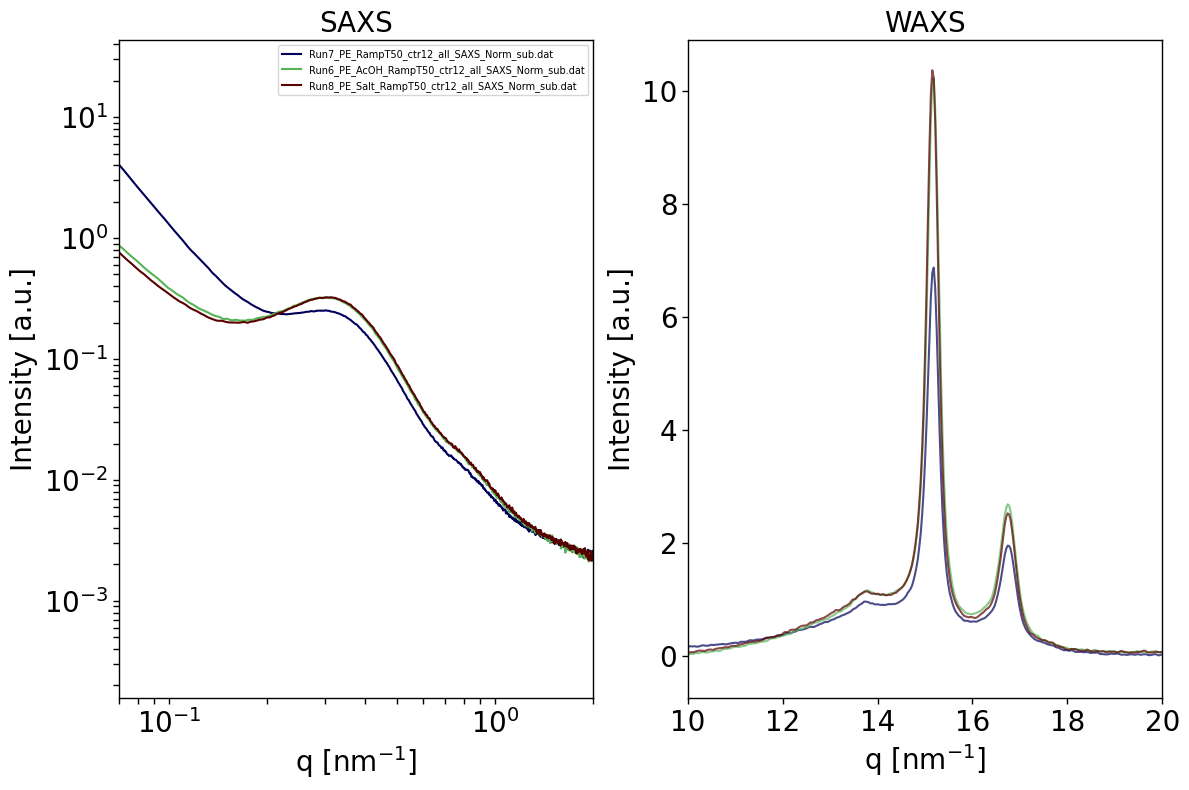

 'Run7*RampT*_ctr30*'
 'Run6*RampT*ctr30*'
 'Run8*RampT*ctr30*'
 'Run7*RampT*_ctr30*'
 'Run6*RampT*ctr30*'
 'Run8*RampT*ctr30*'


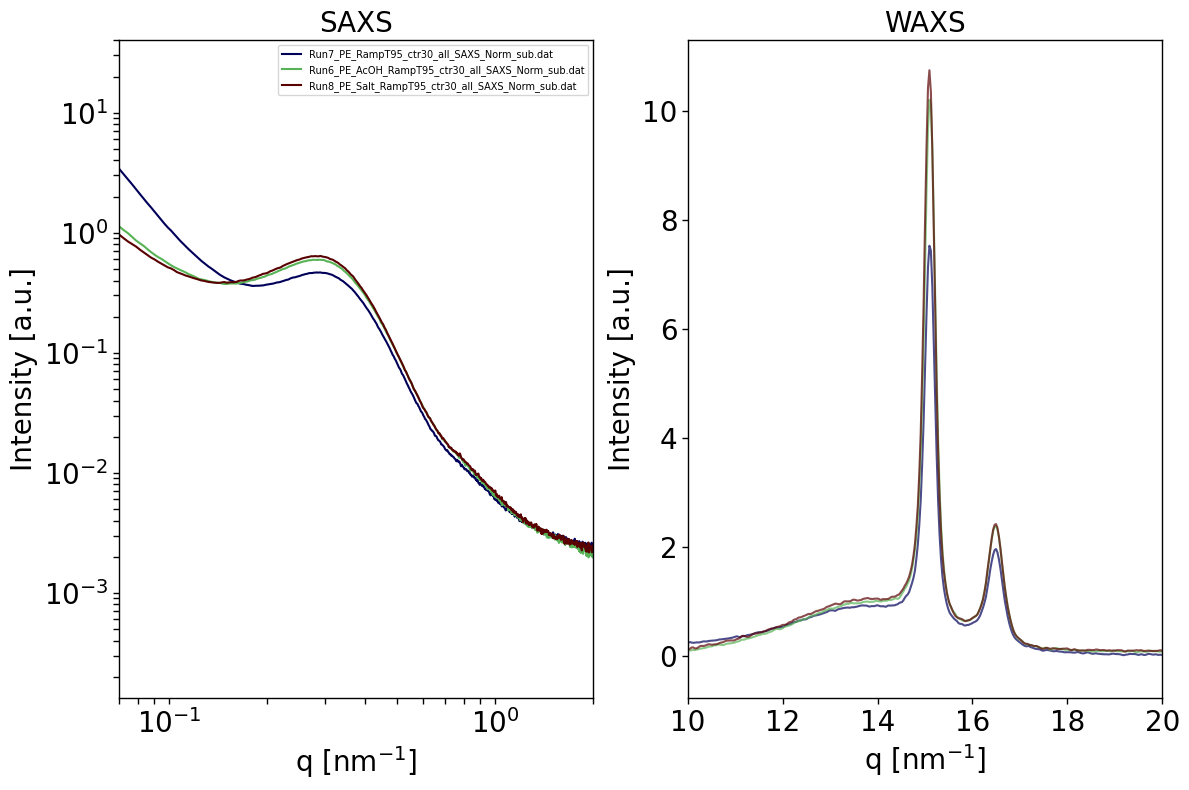

 'Run7*RampT*_ctr40*'
 'Run6*RampT*ctr40*'
 'Run8*RampT*ctr40*'
 'Run7*RampT*_ctr40*'
 'Run6*RampT*ctr40*'
 'Run8*RampT*ctr40*'


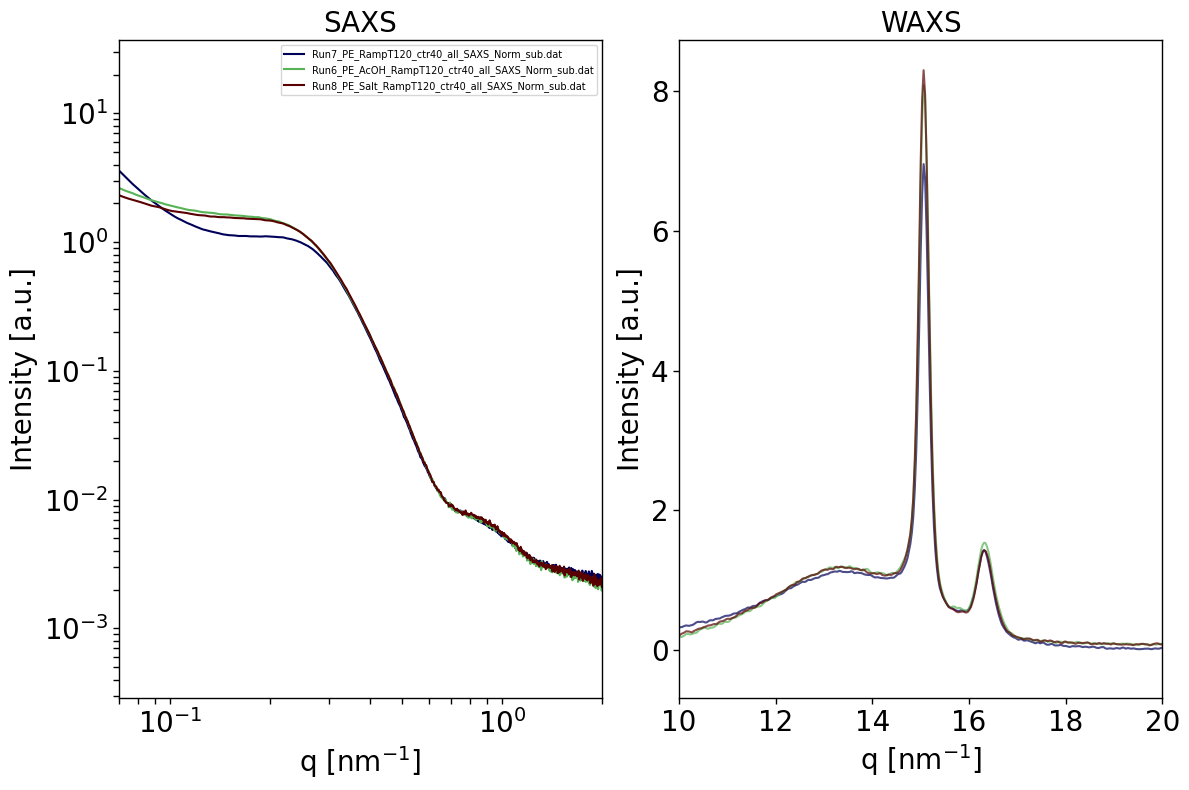

 'Run7*RampT*_ctr42*'
 'Run6*RampT*ctr42*'
 'Run8*RampT*ctr42*'
 'Run7*RampT*_ctr42*'
 'Run6*RampT*ctr42*'
 'Run8*RampT*ctr42*'


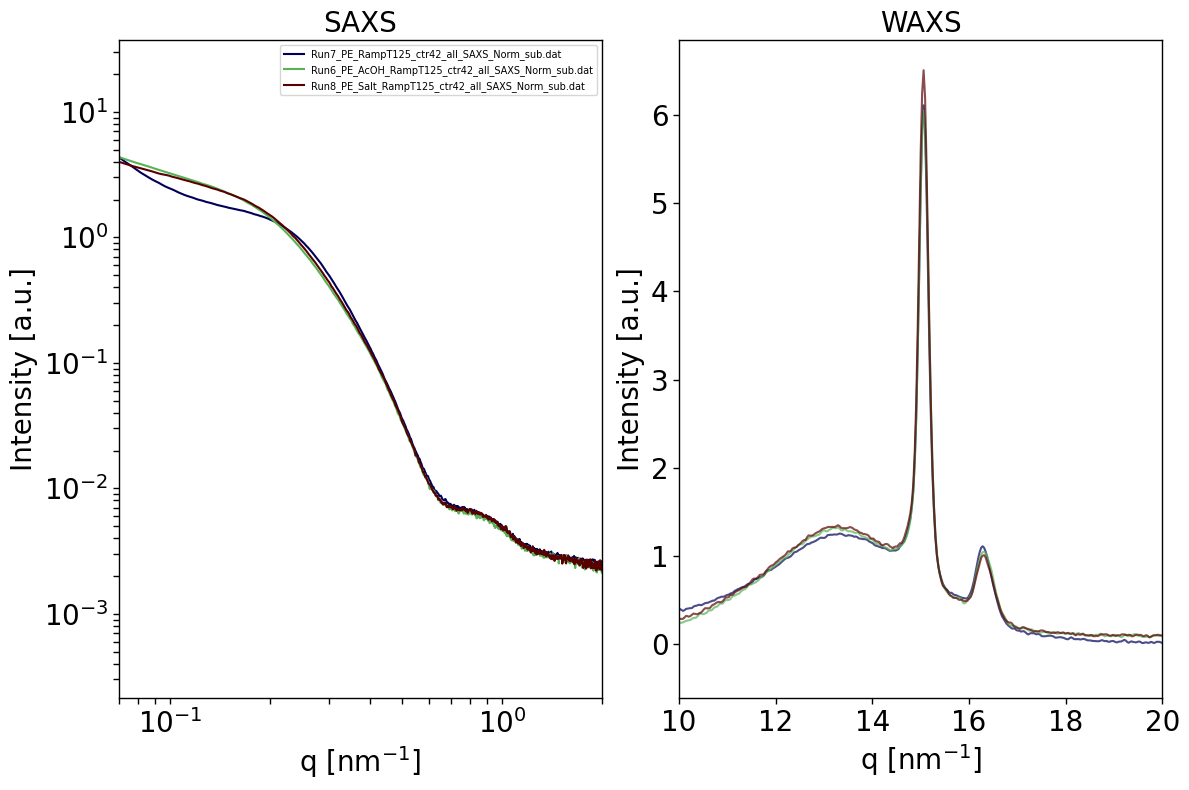

 'Run7*RampT*_ctr43*'
 'Run6*RampT*ctr43*'
 'Run8*RampT*ctr43*'
 'Run7*RampT*_ctr43*'
 'Run6*RampT*ctr43*'
 'Run8*RampT*ctr43*'


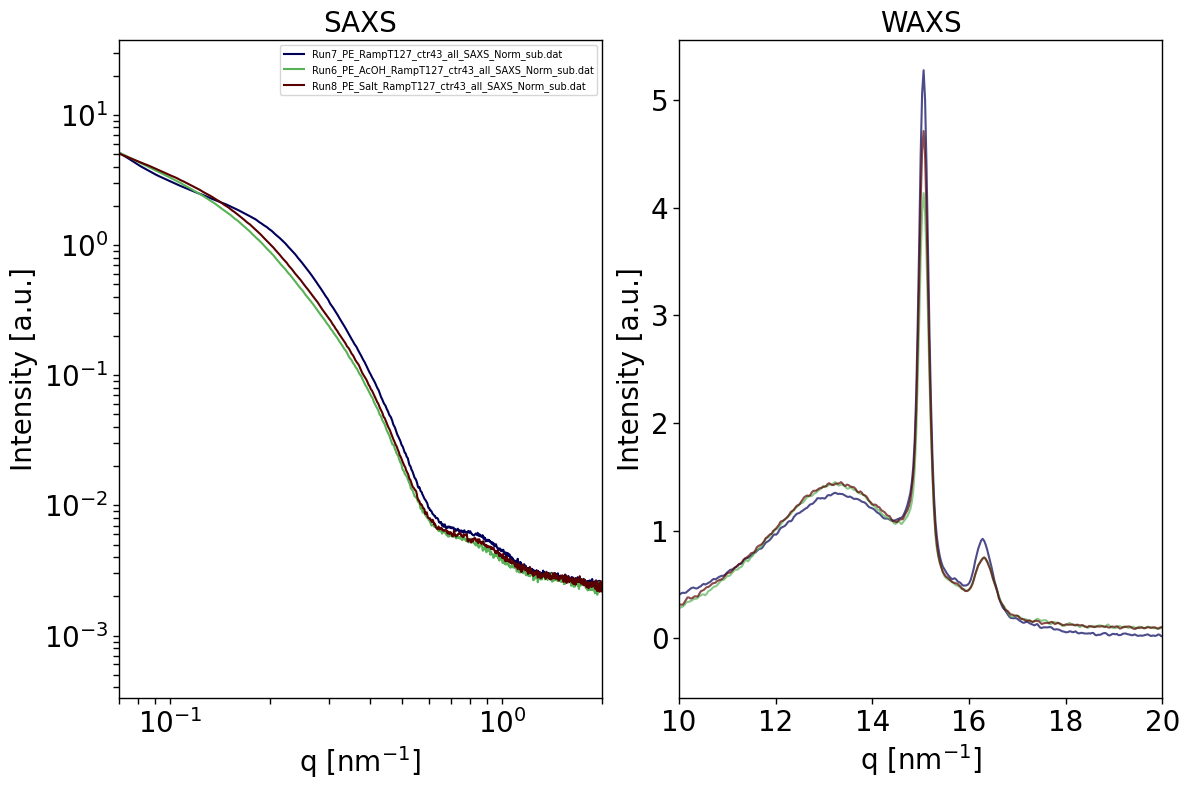

 'Run7*RampT*_ctr44*'
 'Run6*RampT*ctr44*'
 'Run8*RampT*ctr44*'
 'Run7*RampT*_ctr44*'
 'Run6*RampT*ctr44*'
 'Run8*RampT*ctr44*'


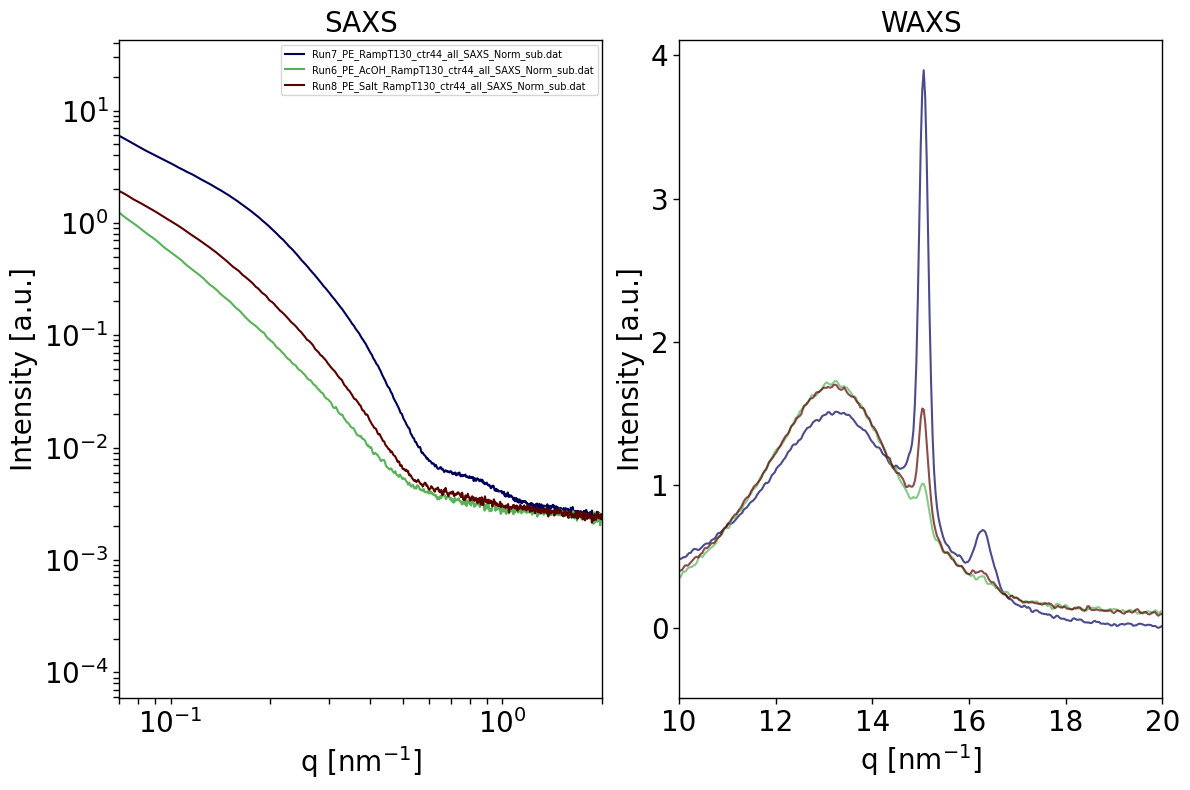

In [31]:
# Run 5

#Run7_PEAcOH2_poly_Solv_10s_03_T25_x19_dy1_ctr0_all_SAXS_Norm_sub_fitted.dat
#Run7_PEAcOH3_poly_Solv_10s_03_T25_x14_dy1_ctr0_all_SAXS_Norm_sub_fitted.dat

all_keywords = [
     ["Run7*RampT50_*", "Run6*RampT50*", "Run8*RampT50*"],
     ["Run7*RampT*_ctr30*",'Run6*RampT*ctr30*','Run8*RampT*ctr30*'],
     ['Run7*RampT*_ctr40*','Run6*RampT*ctr40*','Run8*RampT*ctr40*'],
     ['Run7*RampT*_ctr42*','Run6*RampT*ctr42*','Run8*RampT*ctr42*'],
     ['Run7*RampT*_ctr43*','Run6*RampT*ctr43*','Run8*RampT*ctr43*'],
     ['Run7*RampT*_ctr44*','Run6*RampT*ctr44*','Run8*RampT*ctr44*'],
     #["Run6*RampT30_*"],['Run7*RampT*'], ['Run8*RampT*'],



]

plot_saxs_waxs_data(all_keywords, Run_number="")
